In [1]:
import os
from training.eval_inpaint import InpaintEval
from utils.data_loader import Dataset
from utils.utils import resize_image, load_models, get_masks
from models.pointcloud_inpainting import Inpaint
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import torch
from PIL import Image, ImageDraw, ImageFont

os.environ["OMP_NUM_THREADS"] = "0"
os.environ['CUDA_HOME'] = '/opt/cuda/cuda-10.1'

torch.backends.cudnn.deterministic=True

def tensor_to_numpy(tensor, idx):
    numpyImg = tensor.detach().cpu()[idx].permute(1,2,0).numpy()
    if len(numpyImg.shape) == 3 and numpyImg.shape[2] == 3:
        numpyImg = np.flip(numpyImg, axis=-1)
    return numpyImg

## Loading test dataset and network

In [2]:
indoor_dataset = {'name':'diml-in',
                'path': '/scratch/s182169/DIML/indoor/test/prepared/',
                'params': {'focal': 512, 'baseline':74}} #74 

In [4]:
inpaint_eval = InpaintEval([indoor_dataset], ['./models/trained/inpaint-in-out-adversarial-well.tar'], partial_conv=False)
# inpaint_eval = InpaintEval([indoor_dataset], ['./models/Pretrained_models/pointcloud-inpainting.pytorch'], partial_conv=False)

{'name': 'diml-in', 'path': '/scratch/s182169/DIML/indoor/test/prepared/', 'params': {'focal': 512, 'baseline': 74}}
Loading model state from ['./models/trained/inpaint-in-out-adversarial-well.tar']
Loading models parameters...
Model inpaint loaded succesfully.


## Network evaluation

In [ ]:
inpaint_eval.eval()

## Visualization of the images

In [16]:
tensorImageA, tensorDisparityA, tensorImageB, tensorDisparityB, inpaintImageB, inpaintDisparityB, tensorImageC, tensorMasksC, tensorDisparityC, tensorMasks, zoom_settings = inpaint_eval.get_inpaint(outputRenderC=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


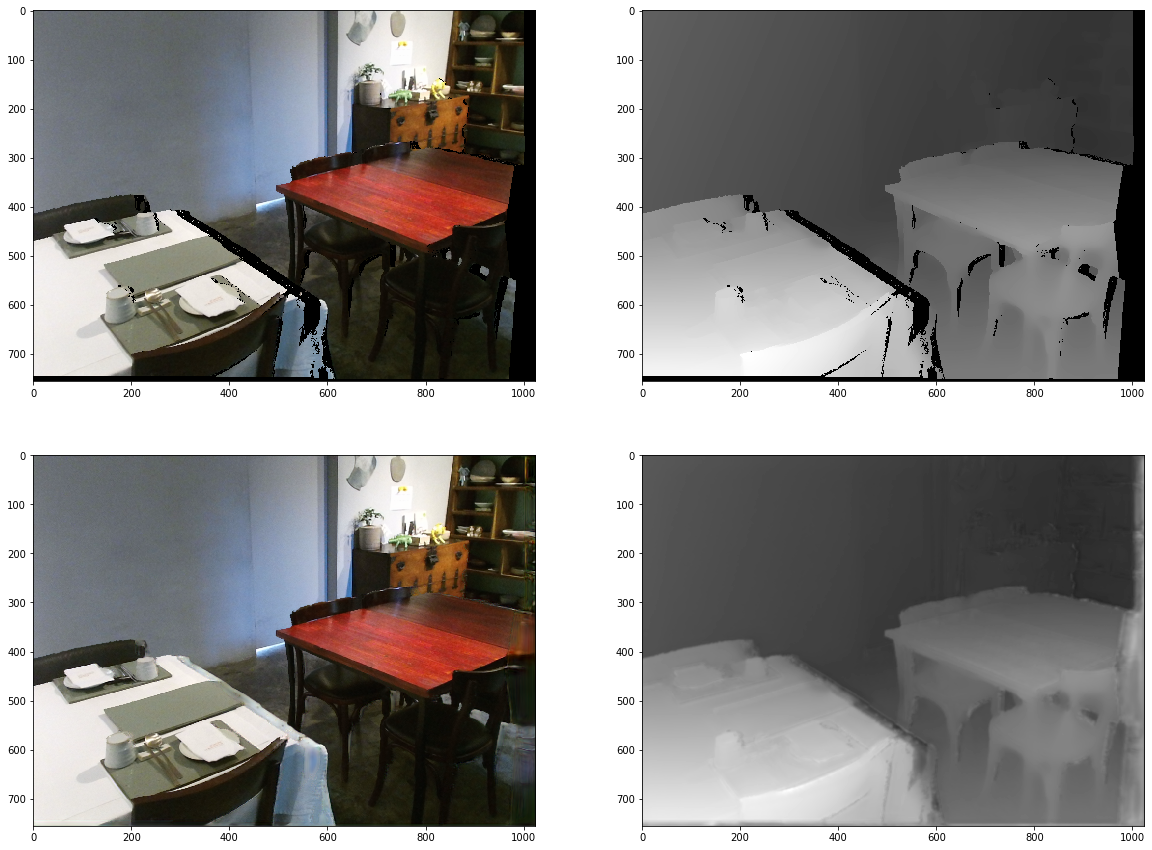

In [17]:
idx = 0
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.imshow(tensor_to_numpy(tensorImageB * tensorMasks, idx))
plt.subplot(2,2,2)
plt.imshow(tensor_to_numpy(tensorDisparityB * tensorMasks, idx)[:,:,0], cmap='gray', vmin=0)
plt.subplot(2,2,3)
plt.imshow(tensor_to_numpy(inpaintImageB, idx))
plt.subplot(2,2,4)
plt.imshow(tensor_to_numpy(inpaintDisparityB, idx)[:,:,0], cmap='gray', vmin=0)